<a href="https://colab.research.google.com/github/delowarshizar/Practice/blob/main/week06_1453.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install networkx pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.9 MB/s eta 0:00:00


In [10]:
import networkx as nx
from matplotlib import pyplot as plt

In [11]:
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
G = nx.Graph()
DG = nx.DiGraph()


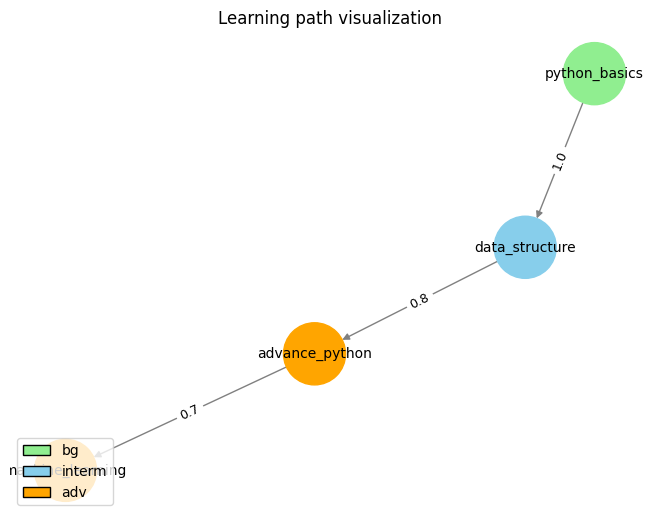

In [23]:
from importlib.metadata import metadata
topics = {
    'python_basics': {'diff':'bg'},
    'data_structure': {'diff':'interm'},
    'advance_python':{'diff':'adv'},
    'machine_learning':{'diff':'adv'},

}


relationships = [
    (('python_basics','data_structure'), {'weight':1.0}),
    (('data_structure','advance_python'), {'weight':0.8}),
    (('advance_python','machine_learning'), {'weight':0.7})

]
G = nx.DiGraph()

for topic, metadata in topics.items():
    G.add_node(topic, **metadata)

for (u, v), data in relationships:
    G.add_edge(u, v, **data)

pos = nx.spring_layout(G)

nod_colors = {
    'bg': 'lightgreen',
    'interm': 'skyblue',
    'adv': 'orange'
}
node_color_list = [nod_colors[G.nodes[node]['diff']] for node in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_color_list,
        node_size=2000, font_size=10,edge_color='gray' )

edge_labels = {(u,v):f"{d['weight']}"for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_size=9)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgreen', edgecolor='black', label='bg'),
                   Patch(facecolor='skyblue', edgecolor='black', label='interm'),
                   Patch(facecolor='orange', edgecolor='black', label='adv')]
plt.legend(handles=legend_elements,loc = 'lower left')
plt.title('Learning path visualization', fontsize=12)
plt.show()

In [25]:
print(F"Number of nodes: {G.number_of_nodes()}")
print(F"Number of edges: {G.number_of_edges() }")

print(f"neighbors of python_basics: {list(G.neighbors('python_basics'))}")
print(f"degree of data_structure: {G.degree('data_structure')}")

Number of nodes: 4
Number of edges: 3
neighbors of python_basics: ['data_structure']
degree of data_structure: 2


In [26]:

shortest_path_1 = nx.shortest_path(G, source='python_basics', target='machine_learning')
shortest_path_2 = nx.shortest_path(G, source='python_basics', target='advance_python')
print(f"Shortest path from python_basics to machine_learning: {shortest_path_1}")
print(f"Shortest path from data_structure to machine_learning: {shortest_path_2}")

Shortest path from python_basics to machine_learning: ['python_basics', 'data_structure', 'advance_python', 'machine_learning']
Shortest path from data_structure to machine_learning: ['python_basics', 'data_structure', 'advance_python']


In [33]:
centrality = nx.degree_centrality(G)
print(f"Degree centrality: {centrality}")

is_connected = nx.is_connected(G.to_undirected())
print(f"Is the graph connected? {is_connected}")


Degree centrality: {'python_basics': 0.3333333333333333, 'data_structure': 0.6666666666666666, 'advance_python': 0.6666666666666666, 'machine_learning': 0.3333333333333333}
Is the graph connected? True


In [34]:
pos = nx.spring_layout(G)

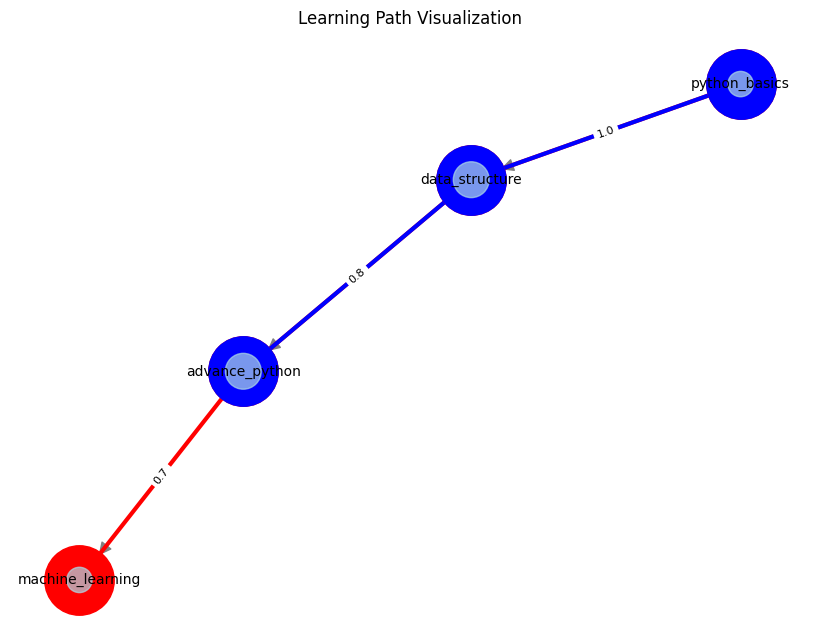

In [41]:
node_colors ={'bg':'lightgreen', 'interm':'skyblue', 'adv':'orange'}
node_color_list = [node_colors[data['diff']] for _ ,data in G.nodes(data=True)]

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_color_list,
        node_size=2000, font_size=10, arrowsize=20, edge_color='gray')

nx.draw_networkx_nodes(G,pos,nodelist=shortest_path_1, node_color='red',node_size=2500)
nx.draw_networkx_edges(G,pos,edgelist=[(shortest_path_1[i],shortest_path_1[i+1]) for i in range(len(shortest_path_1)-1)] , edge_color='red',width=3 )
nx.draw_networkx_nodes(G,pos,nodelist=shortest_path_2, node_color='blue',node_size=2500)
nx.draw_networkx_edges(G,pos,edgelist=[(shortest_path_2[i],shortest_path_2[i+1]) for i in range(len(shortest_path_2)-1)] , edge_color='blue',width=3 )

edge_labels = {(u,v):f"{d['weight']}"for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_size=8)

node_sizes = [v * 1000 for v in centrality.values()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue',alpha=0.7)
plt.title("Learning Path Visualization", fontsize=12)
plt.show()